# Páginas para programar python

## Situación Problema 

- María Fernanda Guillén 
- A01283835

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

In [57]:
#pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%ls

 00_00_binder.ipynb                     Clase5.ipynb
 00_00_primer_pasos.ipynb              'Clase8 (1).ipynb'
 01_01_data_types.ipynb                'Clase 9 (1).ipynb'
 01_02_read_iloc_unique_groupby.ipynb  'Clase9 (1).ipynb'
 02_00_data_wrangling.ipynb             datasets/
 02_01_null_display.ipynb               db.csv
 02_02_basic_math.ipynb                'Ironman World Championship.csv'
 Act5.ipynb                             ramen-ratings.csv
 ACT6.ipynb                             README.md
 ACT6y10.ipynb                          reg_data.csv
 clase2.ipynb                           requirements.txt
 clase3.ipynb                           StudentsPerformance.csv
'Clase4 (2).ipynb'


In [4]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Descripción Base de datos
- La base de datos que descargue fue de “datasets kaggle”, es la base llamada Student Performance, esta base de datos tiene ocho columnas, 
- la base explica el nivel escolar de hombres y mujeres y sus respectivas scores de matemáticas, escritura y lectura, en sus exámenes.


# Descripción de Variables 
- Variables numéricas:
- Math score: describe la calificación de las personas en esta sección.
- reading score: describe la calificación de las personas en esta sección.
- writing score: describe la calificación de las personas en esta sección.
- variables categóricas:
- parental level of education: explica el nivel de educación de las personas.
- test preparation: explica si ha sido completado o no el test.
- Race/ etnicity: se divide en 4 grupos, grupo A, B, C y D.

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
my_pivot = pd.pivot_table(df,
                          index = 'parental level of education',
                          values = ['math score','reading score', 'writing score'],
                          columns = 'gender',
                          aggfunc = 'mean'
                         )
my_pivot                  

math score            reading score             \
gender                          female       male        female       male   
parental level of education                                                  
associate's degree           65.250000  70.764151     74.120690  67.433962   
bachelor's degree            68.349206  70.581818     77.285714  68.090909   
high school                  59.351064  64.705882     68.202128  61.480392   
master's degree              66.500000  74.826087     76.805556  73.130435   
some college                 65.406780  69.009259     73.550847  64.990741   
some high school             59.296703  67.840909     69.109890  64.693182   

                            writing score             
gender                             female       male  
parental level of education                           
associate's degree              74.000000  65.405660  
bachelor's degree               78.380952  67.654545  
high school                     66.691489  58.539216  
master's degree                 77.638889  72.608696  
some college                    74.050847  63.148148  
some high school                68.285714  61.375000

## Existe alguna correlación entre writing score y reading score?

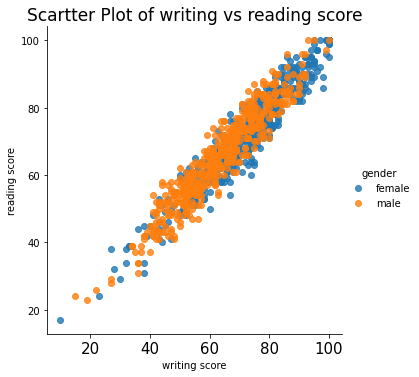

In [7]:
sns.lmplot (x = 'writing score',
            y = 'reading score',
            data = df,
            fit_reg = False,
            hue = 'gender'
           )
plt.title('Scartter Plot of writing vs reading score', fontsize = 17)
plt.xticks(fontsize=15)
plt.show()

# Hallazgo
- la que la correlación entre writing y reading score es muy alta. 
- los datos están muy juntos y alineados en casi en las mismas posiciones entre ambos géneros. 
- Hay una fuerte correlación lineal positiva.


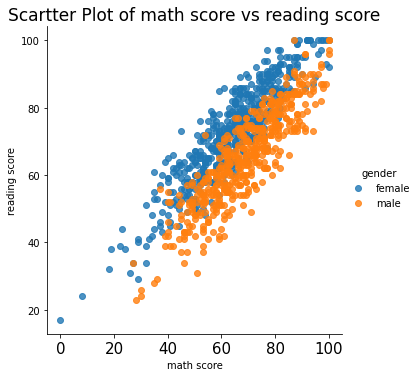

In [8]:
sns.lmplot (x = 'math score',
            y = 'reading score',
            data = df,
            fit_reg = False,
            hue = 'gender'
           )
plt.title('Scartter Plot of math score vs reading score', fontsize = 17)
plt.xticks(fontsize=15)
plt.show()
    

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


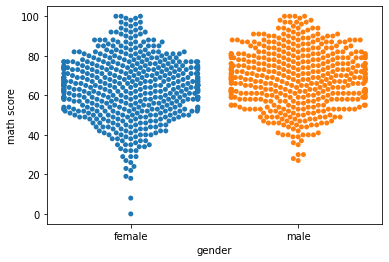

In [9]:
sns.swarmplot(x = 'gender',
              y = 'math score',
              data = df
             )


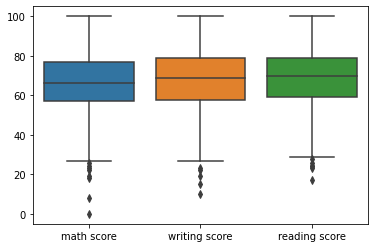

In [10]:
sns.boxplot(data = df.loc[:,['math score','writing score', 'reading score']],)

- Este es un boxplot sobre las tres secciones, math, writing y reading score, 
- podemos ver en donde se concentran los datos, la mediana y los puntos que aparecen en la parte inferior son datos atípicos.

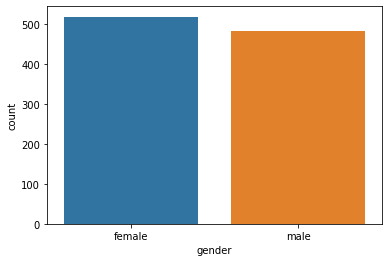

In [11]:
sns.countplot(x = 'gender', data = df)

## Cuáles son los grados de educación de mayor frecuencia?

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

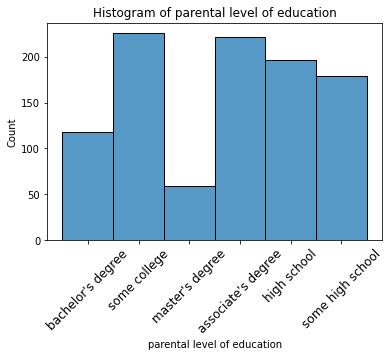

In [12]:
sns.histplot(df['parental level of education'],
             kde = False,
            bins = 20).set_title('Histogram of parental level of education')
plt.xticks(fontsize = 12, rotation = 45)



- Esta es la distribución de los niveles de educación,
- hay mas gente de colleges y associate’s degree, y muy pocas de master’s degree

Text(0.5, 1.0, 'Histogram of test preparation course')

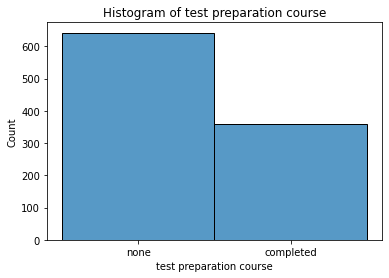

In [13]:
sns.histplot(df['test preparation course'],
             kde = False,
            bins = 20).set_title('Histogram of test preparation course')


- Este es otro histograma que realice sobre quienes ya realizaron el curso de preparación
- Se puede ver cuántos lo han completado y cuántos no

# Limitaciones
- Batallé para realizar ciertas gráficas, había usado otra base de datos pero la cambie ya que no tenía suficientes datos numéricos.
- Así mismo quise realizar gráficas vistas en la clase 5 pero se me complicó. 


# ACT10 (SEGUNDA PARTE)

### Variables Críticas identificadas 
- variables numericas: 
- -math score
- -reading score 
- -writing score.


In [14]:
import pandas as pd

In [15]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [16]:
x = df['math score']
y = df['reading score']
x = x.to_frame()
y = y.to_frame()
type(y)

pandas.core.frame.DataFrame

In [53]:
#pip install statsmodels

In [18]:
import statsmodels.api as sm

In [52]:
#pip install sklearn

In [20]:
from sklearn import linear_model

In [21]:
lm = linear_model.LinearRegression()
lm

LinearRegression()

In [22]:
model_lm = lm.fit(y,x)

In [23]:
print('El intercepto es \t:', model_lm.intercept_)
print('El coeficiente es \t:', model_lm.coef_)
print('El valor de R^2 es \t', model_lm.score(y,x))

El intercepto es 	: [7.35758812]
El coeficiente es 	: [[0.8491002]]
El valor de R^2 es 	 0.668436506450109


In [24]:
model_ols = sm.OLS.from_formula('x~y', data = df) # math score = b0 + b1*reading score; /// reading score = b0 + b1*math score
result = model_ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2012.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          1.79e-241
Time:                        04:09:19   Log-Likelihood:                -3585.3
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     998   BIC:                             7184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3576      1.338      5.498      0.000       4.732       9.984
y              0.8491      0.019     44.855      0.000       0.812       0.886
==============================================================================
Omnibus:                        4.508   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.578
Skew:                          -0.010   Prob(JB):                        0.167
Kurtosis:                       2.708   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
numeros = ([200, 201, 94])
numeros = pd.DataFrame(numeros)
numeros

,0
0,200
1,201
2,94


In [26]:
y = model_lm.predict(numeros) #math score = b0 + b1*reading score;
y = pd.DataFrame(y)
y

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,0
0,177.177629
1,178.026729
2,87.173007


In [51]:
#pip install seaborn


In [28]:
import seaborn as sns

## Pregunta de investigación 1: Existe una relación entre reading score y math score?

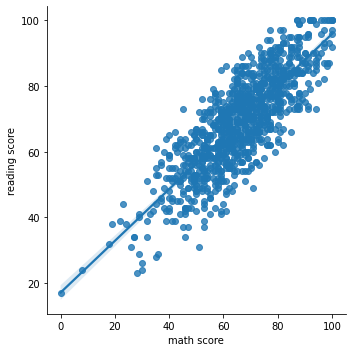

In [29]:
sns.lmplot(x = 'math score',
y = 'reading score', data =df,
          )

In [30]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

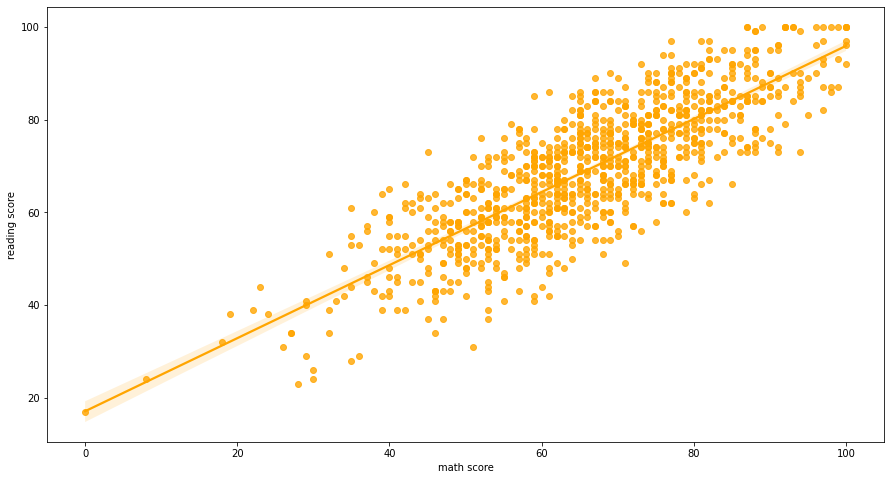

In [31]:
plt.figure(figsize=(15,8))
sns.regplot(x = 'math score',
y = 'reading score', data =df,
            color = 'orange' 
        
          )
sns.set(rc = {'figure.figsize': (15,10)})

# Hipotesis


 - Al realizar la regresión lineal entre la variable math score y reading score se puede ver que hay una tendendencia positiva
- La variable math score y reading score tienen relación entre si 
- Las variables que más se relacionan son reading score y writing score con 0.954598

## Pregunta de investigación: Cual es el impacto de math score en las Mujeres? 

In [43]:
#pip install statsmodels

In [44]:
#pip install seaborn

In [45]:
#pip install sklearn

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as nms
from sklearn import linear_model

In [49]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [68]:
modelA = sm.OLS.from_formula('math score~gender', data = df)  #dependiente y luego independiente
resultA = modelA.fit()
resultA.summary()

SyntaxError: invalid syntax (<unknown>, line 1)